In [1]:
import numpy as np

In [2]:
import matplotlib.pyplot as plt
import mpld3
mpld3.enable_notebook()

In [3]:
dataFile = 'Subject2.txt'

In [4]:
# Load the data into an Numpy array.
rawData = None
rawData = np.loadtxt(dataFile)
print(rawData.shape)

(5005, 10)


In [5]:
#Filter trials with more than 1sec latency and Intruction Button presses with more than 300ms latency
data = rawData
for i in range(len(rawData)-1,-1,-1):
  if data[i,0] > 300 or data[i,1] > 1000:
    data = np.delete(data, i, axis=0)

In [6]:
print(data.shape)

(3466, 10)


In [7]:
# Compute the range and means of latencies
latMin = np.min(data[:, 0])
latMax = np.max(data[:, 1])
#add means
print(np.mean(data[:,0], axis =0)) #Mean of Button release lat.
print(np.std(data[:,0], axis =0)) #Standard dev. of Button release lat.
print(np.mean(data[:,1])) #Mean of Trial lat.
print(np.std(data[:,1])) #Standard dev. of Trial lat.

110.27639930755915
43.80557292965292
630.2853433352568
131.28065854706875


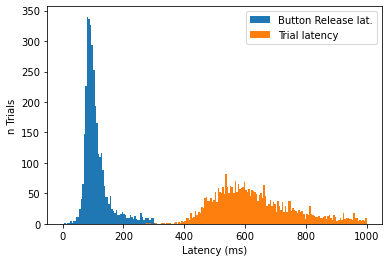

In [8]:
# Plot an histogram of the latencies
_= plt.hist(data[:, 0], bins=np.linspace(0, latMax, 201),label = "Button Release lat.")
_= plt.hist(data[:, 1], bins=np.linspace(0, latMax, 201), label = "Trial latency")
plt.legend()
plt.xlabel("Latency (ms)")
plt.ylabel("n Trials")
plt.savefig("1-GenLats.png")

Text(0, 0.5, 'n Trials')

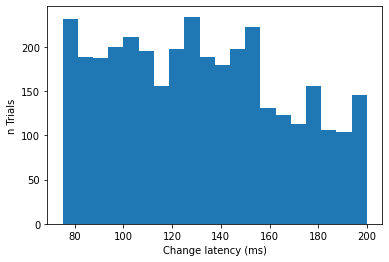

In [9]:
# Plot an histogram of the delay between the change of goal
_ = plt.hist(data[:, 4], bins=np.linspace(np.min(data[:, 4]), np.max(data[:, 4]), 21))

plt.xlabel("Change latency (ms)")
plt.ylabel("n Trials")

In [10]:
# Compute the number of successes versus fails
nTot = np.shape(data)[0]
nSuccess = int(np.sum(data[:, 9]))
nFails = int(nTot - nSuccess)
print("Total number of trials: " + str(nTot) + " (" + str(nSuccess) + " successes, " + str(nFails) + " fails)")

pSuccess= (nSuccess*100)/nTot
print("% of success: " + str(pSuccess))

Total number of trials: 3466 (2227 successes, 1239 fails)
% of success: 64.25274091171379


In [11]:
# Select rows corresponding to successes, failures and instruction changes
idxGood = np.where(data[:, 9] == 1)[0]
idxBad = np.where(data[:, 9] == 0)[0]
idxChanged = np.where(data[:, 3] == 1)[0]
idxNotChanged = np.where(data[:, 3] == 0)[0]
print("Target not changed, bad: " + str(len(np.intersect1d(idxNotChanged, idxBad))))
print("Target not changed, good: " + str(len(np.intersect1d(idxNotChanged, idxGood))))
print("Target changed, bad: " + str(len(np.intersect1d(idxChanged, idxBad))))
print("Target changed, good: " + str(len(np.intersect1d(idxChanged, idxGood))))

#

Target not changed, bad: 407
Target not changed, good: 2010
Target changed, bad: 832
Target changed, good: 217


643.6855036855037
143.0775613482269
624.6482587064677
126.43402369502509
% of success: 83.160943318163


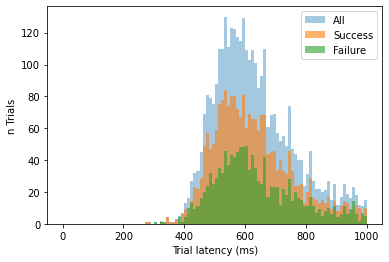

In [12]:
# Print info concerning the fails and successes 
_= plt.hist(data[:, 1], bins=np.linspace(0, latMax, 101), alpha = 0.4, label="All")
_= plt.hist(data[idxGood, 1], bins=np.linspace(0, latMax, 101), alpha = 0.6, label="Success")
_= plt.hist(data[idxBad, 1], bins=np.linspace(0, latMax, 101), alpha = 0.6, label="Failure")

plt.legend()
plt.xlabel("Trial latency (ms)")
plt.ylabel("n Trials")

print(np.mean(data[np.intersect1d(idxNotChanged, idxBad), 1], axis =0)) #Mean of no change failure lat.
print(np.std(data[np.intersect1d(idxNotChanged, idxBad), 1], axis =0)) #Standard dev. of failure lat.
print(np.mean(data[np.intersect1d(idxNotChanged, idxGood), 1])) #Mean of no change success lat.
print(np.std(data[np.intersect1d(idxNotChanged, idxGood), 1])) #Standard dev. of success lat.

#Percentage of success for trials where a change did not occur
pNoChange= (len(np.intersect1d(idxNotChanged, idxGood))*100)/len(idxNotChanged)
print("% of success: " + str(pNoChange))

plt.savefig("2-OK-KO.png")

631.8257211538462
129.7155436758238
651.4608294930875
152.35242791158984
% of success: 20.686367969494757


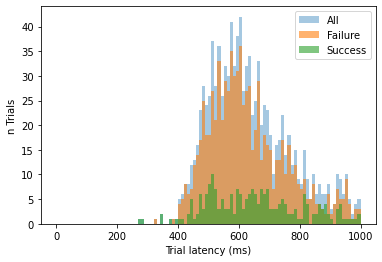

In [13]:
# Print info concerning the fails and successes exculisively during instruction changes
_= plt.hist(data[idxChanged, 1], bins=np.linspace(0, latMax, 101), alpha = 0.4, label="All")
_= plt.hist(data[np.intersect1d(idxChanged, idxBad), 1], bins=np.linspace(0, latMax, 101), alpha = 0.6, label="Failure")
_= plt.hist(data[np.intersect1d(idxChanged, idxGood), 1], bins=np.linspace(0, latMax, 101), alpha = 0.6, label="Success")

plt.legend()
plt.xlabel("Trial latency (ms)")
plt.ylabel("n Trials")

print(np.mean(data[np.intersect1d(idxChanged, idxBad), 1], axis =0)) #Mean failure lat.
print(np.std(data[np.intersect1d(idxChanged, idxBad), 1], axis =0)) #Standard dev. of failure lat.
print(np.mean(data[np.intersect1d(idxChanged, idxGood), 1])) #Mean of success lat.
print(np.std(data[np.intersect1d(idxChanged, idxGood), 1])) #Standard dev. of success lat.

#Percentage of success for trials where a change occured
pChange= (len(np.intersect1d(idxChanged, idxGood))*100)/len(idxChanged)
print("% of success: " + str(pChange))

plt.savefig("3-OK-KO-Change.png")

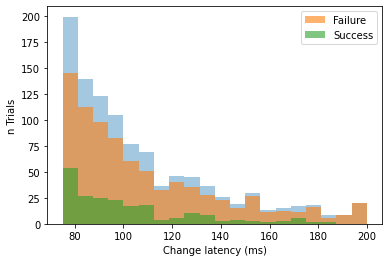

In [14]:
# Plot an histogram of the delay between the change of goal
_ = plt.hist(data[idxChanged, 4], bins=np.linspace(np.min(data[:, 4]), np.max(data[:, 4]), 21), alpha=0.4)
_ = plt.hist(data[np.intersect1d(idxChanged, idxBad), 4], bins=np.linspace(np.min(data[:, 4]), np.max(data[:, 4]), 21), alpha = 0.6, label="Failure")
_ = plt.hist(data[np.intersect1d(idxChanged, idxGood), 4], bins=np.linspace(np.min(data[:, 4]), np.max(data[:, 4]), 21), alpha = 0.6, label="Success")

plt.legend()
plt.xlabel("Change latency (ms)")
plt.ylabel("n Trials")

plt.savefig("4-ChangeLat.png")

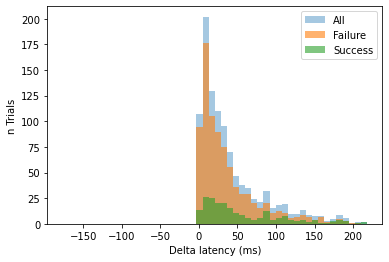

In [15]:
# Plot an histogram of successes
deltaLat = data[:, 0] - data[:, 4]
nBins = 51
ch = plt.hist(deltaLat[idxChanged], bins=np.linspace(np.min(deltaLat), np.max(deltaLat), nBins), alpha = 0.4, label="All")
bch = plt.hist(deltaLat[np.intersect1d(idxChanged, idxBad)], bins=np.linspace(np.min(deltaLat), np.max(deltaLat), nBins), alpha = 0.6, label="Failure")
gch = plt.hist(deltaLat[np.intersect1d(idxChanged, idxGood)], bins=np.linspace(np.min(deltaLat), np.max(deltaLat), nBins), alpha = 0.6, label="Success")

plt.legend()
plt.xlabel("Delta latency (ms)")
plt.ylabel("n Trials")

plt.savefig("5-DeltaLat.png")

<ipython-input-16-c4a1147b35d4>:1: RuntimeWarning: invalid value encountered in true_divide
  ratio_good = gch[0] / ch[0]
<ipython-input-16-c4a1147b35d4>:2: RuntimeWarning: invalid value encountered in true_divide
  ratio_bad = bch[0] / ch[0]


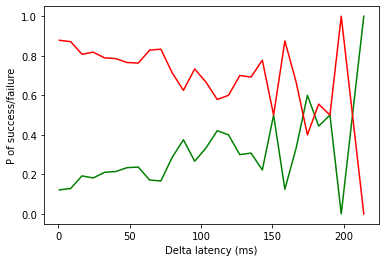

In [16]:
ratio_good = gch[0] / ch[0]
ratio_bad = bch[0] / ch[0]
plt.plot(0.5 * ch[1][1:] + 0.5 * ch[1][:-1], ratio_good, 'g', label = "Success")
plt.plot(0.5 * ch[1][1:] + 0.5 * ch[1][:-1], ratio_bad, 'r', label = "Failure")

plt.xlabel("Delta latency (ms)")
plt.ylabel("P of success/failure")

plt.savefig("6-Ratios.png")

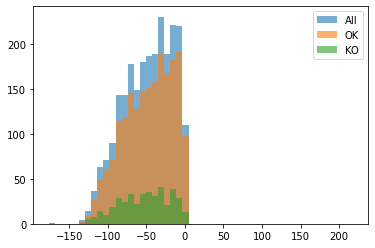

In [17]:
# Plot an histogram of the delay between the change of goal
deltaLat = data[:, 0] - data[:, 4]
ch_notChanged = plt.hist(deltaLat[idxNotChanged], bins=np.linspace(np.min(deltaLat), np.max(deltaLat), nBins), alpha = 0.6, label="All")
gch_notChanged = plt.hist(deltaLat[np.intersect1d(idxNotChanged, idxGood)], bins=np.linspace(np.min(deltaLat), np.max(deltaLat), nBins), alpha = 0.6, label="OK")
bch_notChanged = plt.hist(deltaLat[np.intersect1d(idxNotChanged, idxBad)], bins=np.linspace(np.min(deltaLat), np.max(deltaLat), nBins), alpha = 0.6, label="KO")
plt.legend()

<ipython-input-18-6dea943bb007>:1: RuntimeWarning: invalid value encountered in true_divide
  ratio_good_notChanged = gch_notChanged[0] / ch_notChanged[0]
<ipython-input-18-6dea943bb007>:2: RuntimeWarning: invalid value encountered in true_divide
  ratio_bad_notChanged = bch_notChanged[0] / ch_notChanged[0]


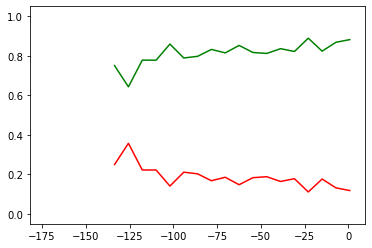

In [18]:
ratio_good_notChanged = gch_notChanged[0] / ch_notChanged[0]
ratio_bad_notChanged = bch_notChanged[0] / ch_notChanged[0]
plt.plot(0.5 * ch_notChanged[1][1:] + 0.5 * ch_notChanged[1][:-1], ratio_good_notChanged, 'g')
plt.plot(0.5 * ch_notChanged[1][1:] + 0.5 * ch_notChanged[1][:-1], ratio_bad_notChanged, 'r')